# Vocoder Analysis

### Setup:

In [10]:
# numerical
import scipy.io
import scipy.signal
import numpy as np
# plotting
import matplotlib.pyplot as plt
%matplotlib notebook
# warnings
import warnings
warnings.filterwarnings('ignore')  # shut warnings

### Loading files:

In [11]:
mat = scipy.io.loadmat('sintesis.mat')  # dict
# delete useless data
del mat['__header__']
del mat['__version__']
del mat['__globals__']
print(mat.keys())

dict_keys(['coef', 'excit', 'ganancia'])


In [12]:
B = mat['ganancia'][0]
a_i = mat['coef']
x_n = mat['excit']

print("B   (type, shape) = ", type(B), B.shape)
print("a_i (type, shape) = ", type(a_i), a_i.shape)
print("x_n (type, shape) = ", type(x_n), x_n.shape)

B   (type, shape) =  <class 'numpy.ndarray'> (401,)
a_i (type, shape) =  <class 'numpy.ndarray'> (401, 11)
x_n (type, shape) =  <class 'numpy.ndarray'> (401, 120)


# Apartat A

<IPython.core.display.Javascript object>


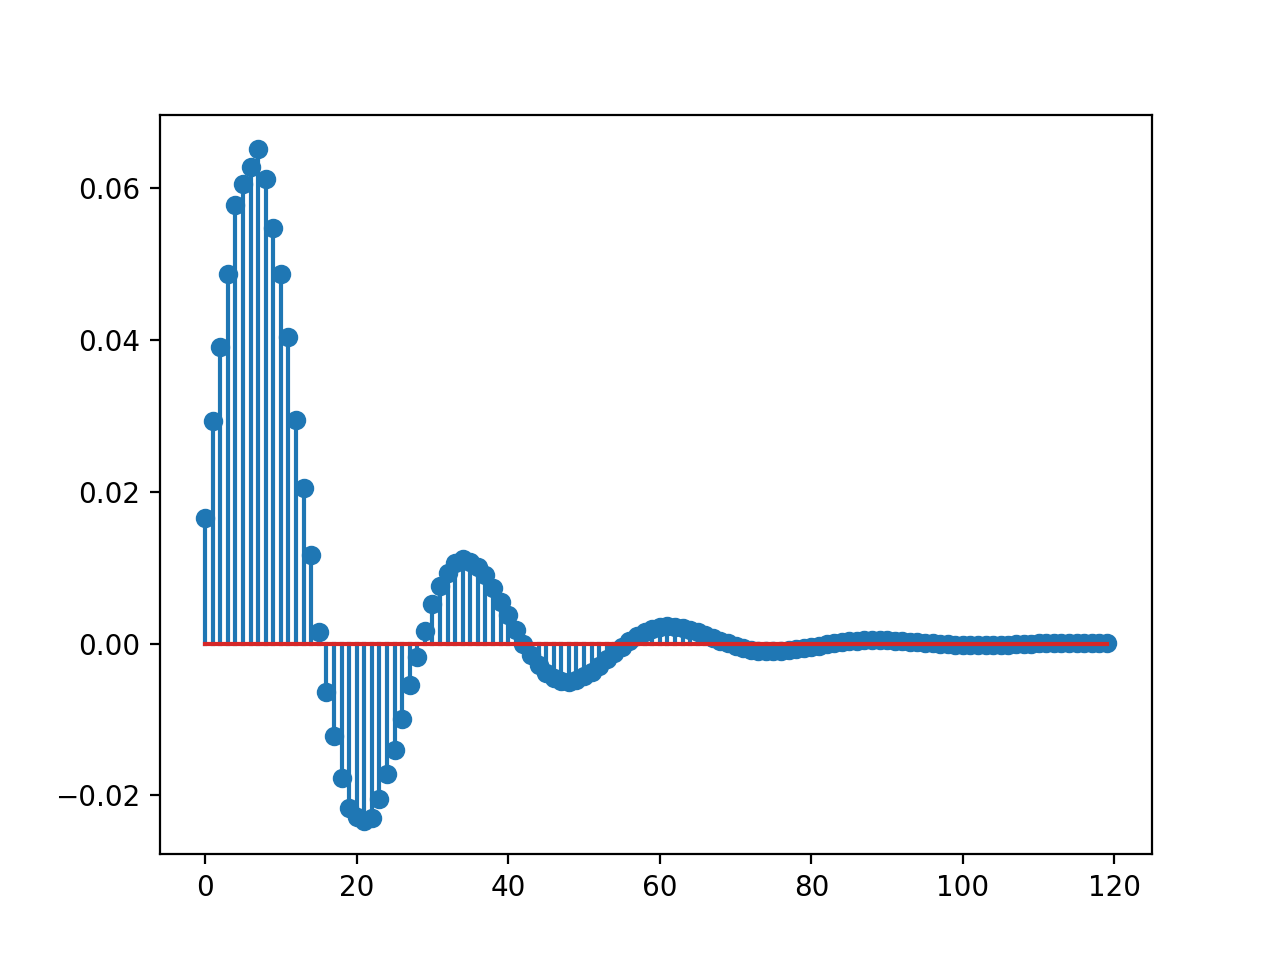

<StemContainer object of 3 artists>

In [13]:
dK = np.array([1]+[0]*119)  # delta de Kronecker
h_n = scipy.signal.lfilter([B[99]], a_i[99], dK, axis= -1, zi=None)  # respuesta impulsional
plt.close('all')
plt.stem(range(120), h_n)

resposta impulsional (fig 2) la qual té mida 120.

# Apartat B

<IPython.core.display.Javascript object>


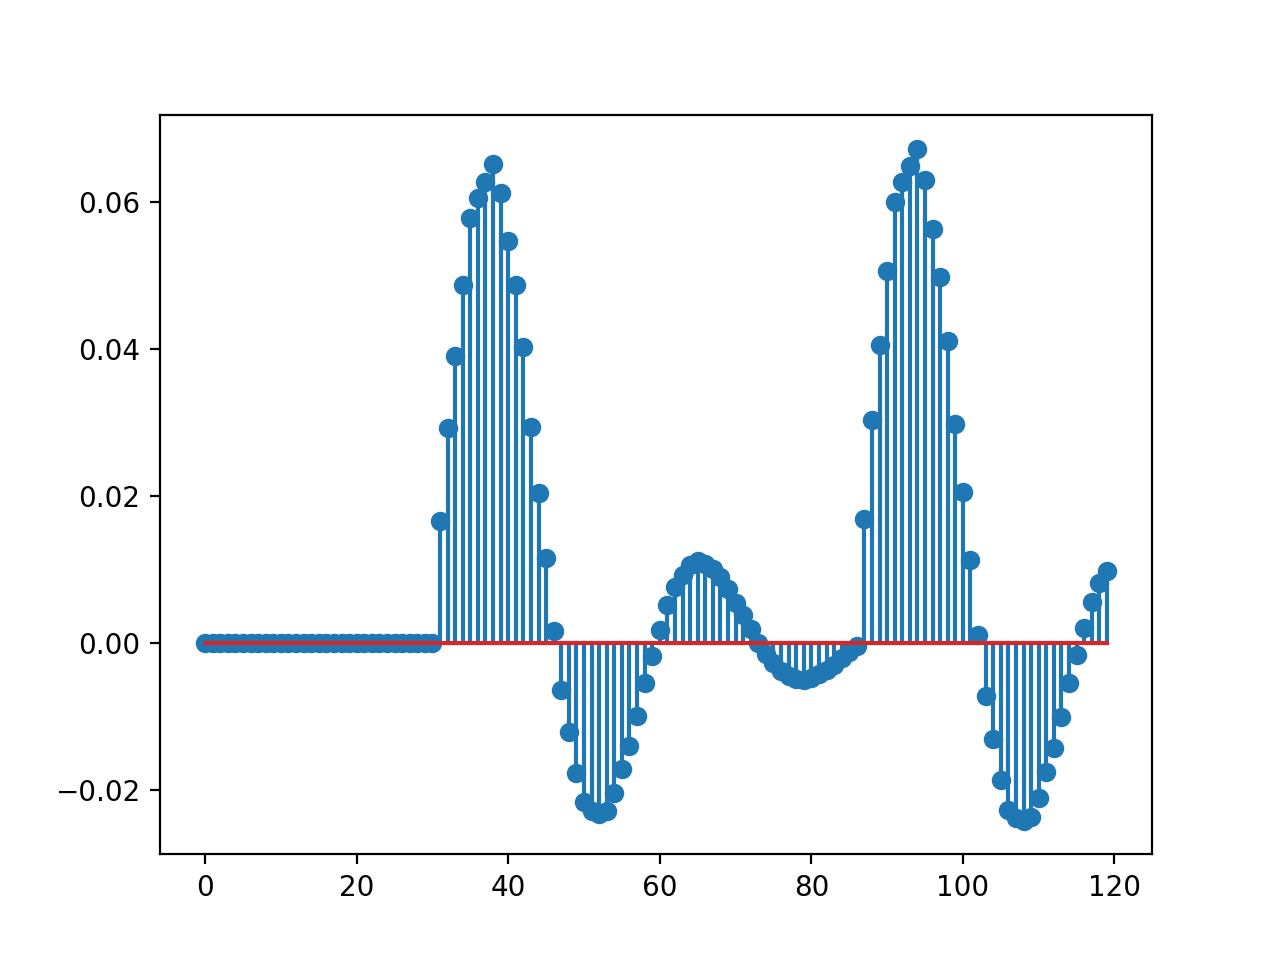

<StemContainer object of 3 artists>

In [14]:
y_n = scipy.signal.lfilter([B[99]], a_i[99], x_n[99], axis= -1, zi=None)
plt.close('all')
plt.stem(range(120), y_n)

# Apartat C

<class 'numpy.ndarray'>


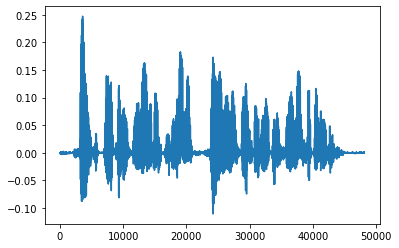

In [8]:
salida = np.array([])
print(type(salida))
for n in range(401):
    salida = np.append(salida, scipy.signal.lfilter([B[n]], a_i[n], x_n[n], axis= -1, zi=None))

plt.close('all')
plt.plot(range(120*401), salida)

In [15]:
import sounddevice as sd

sd.play(salida, 120*401)